In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import os

In [53]:
nodelist=np.array([1,2,4,8,16])
workers_per_node = 48
filepath="/home/felipe/GitBackUps/Testresults/Sleeptime/Juwels"
datalist=[]

for i in range(len(nodelist)):
    datalist.append(pd.read_csv(
        os.path.join(filepath,"sleeptimeresults"+str(nodelist[i])+".txt"),
        delimiter = ", ", engine = 'python'))

data1worker=pd.read_csv(os.path.join(filepath,"sleeptimeresults0.txt"), delimiter = ", ", engine = 'python')
    
pop_sizes = datalist[0].loc[datalist[0]['Look_ahead']=='PPP']['Pop size'].values

meanslist = []

for i in range(len(nodelist)):
    meanslist.append(datalist[i].loc[datalist[0]['Look_ahead']=='PPP']['Runtime Expectation'].values)
    meanslist.append(datalist[i].loc[datalist[0]['Look_ahead']=='Ori']['Runtime Expectation'].values)
    meanslist.append(datalist[i].loc[datalist[0]['Look_ahead']=='Stat']['Runtime Expectation'].values)


In [54]:
PPParray=np.zeros((len(nodelist),len(pop_sizes)))
ORIarray=np.zeros((len(nodelist),len(pop_sizes)))
Statarray=np.zeros((len(nodelist),len(pop_sizes)))

for i in range(len(nodelist)):
    PPParray[i,:]=meanslist[3*i]
    ORIarray[i,:]=meanslist[3*i+1]
    Statarray[i,:]=meanslist[3*i+2]
    


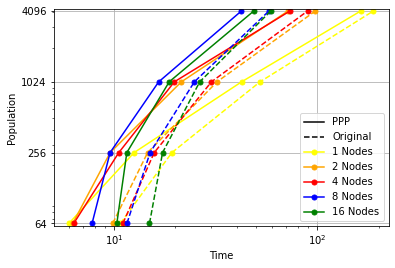

In [34]:
colors=["yellow", "orange" ,"red", "blue", "green", "purple"]


plt.plot([0],[10], label="PPP", color = "black")

plt.plot([0],[10], label="Original", color = "black", linestyle = "dashed")

#plt.plot(PPParray[0,:],pop_sizes,label=str(nodes[0])+" Cores", marker="o", markersize=5, color=colors[0])

for i in range(0,len(nodelist)):
    plt.plot(PPParray[i,:],pop_sizes,label=str(nodelist[i])+" Nodes", marker="o", markersize=5, color=colors[i])
    plt.plot(ORIarray[i,:],pop_sizes, marker="o", markersize=5, color = colors[i], linestyle="dashed")
    
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.ylabel("Population")
plt.yticks(pop_sizes,pop_sizes)
plt.xscale('log')
plt.xlabel("Time")
plt.ylim(0.95*pop_sizes[0],1.05*pop_sizes[-1])
plt.savefig("/home/felipe/MTGraphics/Cores_PopRuntime.jpg")
plt.show()

In [46]:
pop_sizes_1=pop_sizes[0:-1]

means1PPP = data1worker.loc[data1worker['Look_ahead']=='PPP']['Runtime Expectation'].values
means1PPP = np.append(means1PPP, 4*means1PPP[-1])

par_efficiency=np.zeros((len(nodelist),len(pop_sizes)))

for i in range(0,len(nodelist)):
    for j in range(0,len(pop_sizes)):
        par_efficiency[i,j]=means1PPP[j]/(PPParray[i,j]*nodelist[i]*workers_per_node)

print(par_efficiency)

par_efficiency_ori=np.zeros((len(nodelist),len(pop_sizes)))

for i in range(0,len(nodelist)):
    for j in range(0,len(pop_sizes)):
        par_efficiency_ori[i,j]=means1PPP[j]/(ORIarray[i,j]*nodelist[i]*workers_per_node)

print(par_efficiency_ori)

par_efficiency_stat=np.zeros((len(nodelist),len(pop_sizes)))

for i in range(0,len(nodelist)):
    for j in range(0,len(pop_sizes)):
        par_efficiency_stat[i,j]=means1PPP[j]/(Statarray[i,j]*nodelist[i]*workers_per_node)

print(par_efficiency_stat)


[[0.36078713 0.66694452 0.78384229 0.81357287]
 [0.17270456 0.43730495 0.77574527 0.92689665]
 [0.08537479 0.19826888 0.42004378 0.45355327]
 [0.03468716 0.10942006 0.25072809 0.3932478 ]
 [0.01310078 0.04525142 0.11129219 0.17083302]]
[[0.201267   0.43447399 0.63615156 0.70491744]
 [0.10980479 0.28605583 0.517891   0.68031517]
 [0.04891965 0.13272388 0.27575547 0.37140836]
 [0.02336356 0.06952958 0.1673829  0.28772748]
 [0.00904716 0.03017874 0.07874243 0.14092652]]
[[0.07379318 0.22988727 0.497984   0.601795  ]
 [0.02090287 0.09103807 0.28477376 0.4749392 ]
 [0.00459107 0.02250421 0.080967   0.22525946]
 [0.00460561 0.01797932 0.07170736 0.16832344]
 [0.00203955 0.00963031 0.04017651 0.08740162]]


<ipython-input-70-f7375aef1ab1>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(np.append(pop_sizes,2*pop_sizes[-1]), np.append(nodelist,2*nodelist[-1]),  kekse)


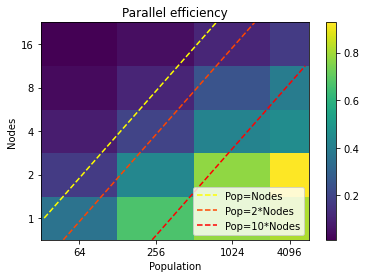

In [70]:
y = np.array([math.sqrt(2),2,4,8,16,32])
y1=np.append(1,y)
y2=y1[:-1]

kekse=np.zeros((len(nodelist)+1,len(pop_sizes)+1))
kekse[:-1,:-1]=par_efficiency
fig, ax = plt.subplots()
im = ax.pcolormesh(np.append(pop_sizes,2*pop_sizes[-1]), np.append(nodelist,2*nodelist[-1]),  kekse)
fig.colorbar(im)

plt.plot(workers_per_node*y,y, color="yellow", linestyle="dashed", label="Pop=Nodes")
plt.plot(workers_per_node*2*np.array(y1),y1, color="orangered", linestyle="dashed", label="Pop=2*Nodes")
plt.plot(workers_per_node*10*np.array(y2),y2, color="red", linestyle="dashed", label="Pop=10*Nodes")
plt.legend(loc=4)
plt.xscale('log')
plt.xlabel("Population")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
tick_locs_x = np.zeros(len(pop_sizes))
for i in range(0,len(pop_sizes)-1):
    tick_locs_x[i] = pop_sizes[i]*math.sqrt(pop_sizes[i+1]/pop_sizes[i])
tick_locs_x[-1]=math.sqrt(2)*pop_sizes[-1]
plt.xticks(tick_locs_x,pop_sizes)

plt.yscale('log')
plt.ylabel("Nodes")
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.yticks(math.sqrt(2)*nodelist,nodelist)
ax.axis('tight')
plt.title('Parallel efficiency')
plt.savefig("/home/felipe/MTGraphics/PPPParallelEff.jpg")
plt.show()

<ipython-input-73-fa414821bb57>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(np.append(pop_sizes,2*pop_sizes[-1]), np.append(nodelist,2*nodelist[-1]),  diff)


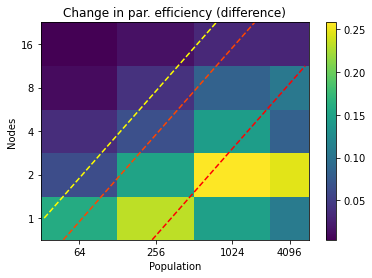

In [73]:
diff = np.zeros((len(nodelist)+1,len(pop_sizes)+1))
diff[:-1,:-1] = par_efficiency-par_efficiency_ori
fig, ax = plt.subplots()
im = ax.pcolormesh(np.append(pop_sizes,2*pop_sizes[-1]), np.append(nodelist,2*nodelist[-1]),  diff)
fig.colorbar(im)
plt.plot(workers_per_node*y,y, color="yellow", linestyle="dashed", label="Pop=Nodes")
plt.plot(workers_per_node*2*np.array(y1),y1, color="orangered", linestyle="dashed", label="Pop=2*Nodes")
plt.plot(workers_per_node*10*np.array(y2),y2, color="red", linestyle="dashed", label="Pop=10*Nodes")
plt.xscale('log')
plt.xlabel("Population")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
tick_locs_x = np.zeros(len(pop_sizes))
for i in range(0,len(pop_sizes)-1):
    tick_locs_x[i] = pop_sizes[i]*math.sqrt(pop_sizes[i+1]/pop_sizes[i])
tick_locs_x[-1]=math.sqrt(2)*pop_sizes[-1]
plt.xticks(tick_locs_x,pop_sizes)

plt.yscale('log')
plt.ylabel("Nodes")
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.yticks(math.sqrt(2)*nodelist,nodelist)
plt.title('Change in par. efficiency (difference)')
plt.savefig("/home/felipe/MTGraphics/ChangeinParEff.jpg")
plt.show()

<ipython-input-74-a3fa8512c048>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(np.append(pop_sizes,2*pop_sizes[-1]), np.append(nodelist,2*nodelist[-1]),  frac)


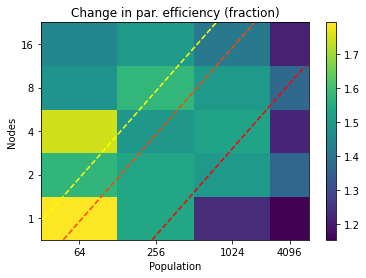

In [74]:
frac = np.zeros((len(nodelist)+1,len(pop_sizes)+1))
frac[:-1,:-1] = par_efficiency/par_efficiency_ori
fig, ax = plt.subplots()
im = ax.pcolormesh(np.append(pop_sizes,2*pop_sizes[-1]), np.append(nodelist,2*nodelist[-1]),  frac)
fig.colorbar(im)
plt.plot(workers_per_node*y,y, color="yellow", linestyle="dashed", label="Pop=Workers")
plt.plot(workers_per_node*2*np.array(y1),y1, color="orangered", linestyle="dashed", label="Pop=2*Workers")
plt.plot(workers_per_node*10*np.array(y2),y2, color="red", linestyle="dashed", label="Pop=10*Workers")
plt.xscale('log')
plt.xlabel("Population")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
tick_locs_x = np.zeros(len(pop_sizes))
for i in range(0,len(pop_sizes)-1):
    tick_locs_x[i] = pop_sizes[i]*math.sqrt(pop_sizes[i+1]/pop_sizes[i])
tick_locs_x[-1]=math.sqrt(2)*pop_sizes[-1]
plt.xticks(tick_locs_x,pop_sizes)

plt.yscale('log')
plt.ylabel("Nodes")
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.yticks(math.sqrt(2)*nodelist,nodelist)
plt.title('Change in par. efficiency (fraction)')
plt.savefig("/home/felipe/MTGraphics/ChangeinParEffFrac.jpg")
plt.show()

<AxesSubplot:>

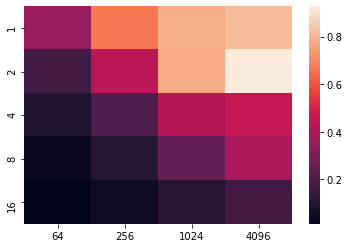

In [75]:
import seaborn

seaborn.heatmap(par_efficiency, xticklabels=pop_sizes, yticklabels=nodelist)